In [1]:
import os
os.environ["DEVELOPMENT"] = '1'

from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent,IrrigationManagement
from aquacrop.utils import prepare_weather, get_filepath
import pandas as pd
import numpy as np

INFO:root:Running the simulation in development mode.


c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\root_zone_water.py:4: NumbaPendingDeprecationWarning: The 'pycc' module is pending deprecation. Replacement technology is being developed.

Pending Deprecation in Numba 0.57.0. For more information please see: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-the-numba-pycc-module
  from numba.pycc import CC
INFO:root:"C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22000.0\ucrt" "-IC:\Program Files (x86)\Windows Kits

Start with initial test that Han's version works WITHOUT either need_calib=1 or calibrated values: (though I have already made changes to the structure, this shouldn't affect functionality)

In [2]:
filepath=get_filepath('tunis_climate.txt')

weather_data = prepare_weather(filepath)

# soil
sandy_loam = Soil(soil_type='SiltLoam')

# crops
wheat = Crop('Wheat', planting_date='10/01')

# IWC
InitWC = InitialWaterContent(value=['FC'])

# irr management
irr_mngt = IrrigationManagement(irrigation_method=0)

In [4]:
model1 = AquaCropModel(sim_start_time=f'{1979}/10/01',
                      sim_end_time=f'{1985}/05/30',
                      weather_df=weather_data,
                      soil=sandy_loam,
                      crop=wheat,
                      irrigation_management=irr_mngt,
                      initial_water_content=InitWC)

model1.run_model(till_termination=True)

c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: invalid value encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewCond_DAP]*WPadj)
c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewCond_DAP]*WPadj)
c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\HIadj_pre_anthesis.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  Br = NewCond_B / NewCond_B_NS
c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: invalid value encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewC

True

In [5]:
sf_es=model1.crop.sf_es
Ksexpf_es=model1.crop.Ksexpf_es
fcdecline_es=model1.crop.fcdecline_es
Kswp_es=model1.crop.Kswp_es
Ksccx_es=model1.crop.Ksccx_es
relbio_es=model1.crop.relbio_es

In [8]:
stress=57#give the value shown in AquaCrop-windows interface for test
IrrMethod=0
print(sf_es)
print(int(np.argmin(np.abs(sf_es[0:100]-stress/100))))
loc_=np.argmin(np.abs(sf_es[0:100]-stress/100))

Ksccx=Ksccx_es[loc_]
Ksexpf=Ksexpf_es[loc_]
Kswp=Kswp_es[loc_]
fcdecline=fcdecline_es[loc_]

#to compared with the windows-interface
#for very poor soil fertility stress, this value may be adjusted again during initialization
# print(int((1-Ksccx)*100))
# print(int((1-Ksexpf)*100))
# print(int(fcdecline*10000)/100)
# print(int((1-Kswp)*100))

ccx_=(1-Ksccx)*100
cgc_=(1-Ksexpf)*100
dcc_=fcdecline*10000/100
wp_=(1-Kswp)*100

wheat = Crop('WheatGDDAQTEST', planting_date='11/01',Ksccx=1-ccx_/100,Ksexpf=1-cgc_/100,Kswp=1-wp_/100,fcdecline=dcc_/100,\
                 sfertstress=stress/100,sf_es=sf_es,Ksexpf_es=Ksexpf_es,fcdecline_es=fcdecline_es,Kswp_es=Kswp_es,\
                Ksccx_es=Ksccx_es,relbio_es=relbio_es)


irrMet=IrrigationManagement(irrigation_method=IrrMethod)

model_os = AquaCropModel(
            sim_start_time=f"{1979}/11/01",
            sim_end_time=f"{1980}/05/05",
            weather_df=weather_data,
            soil=Soil(soil_type='SandyLoam'),
            crop=wheat,
            initial_water_content=InitialWaterContent(value=['FC']),
            irrigation_management=irrMet
        )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
0


In [9]:
model_os.run_model(till_termination=True)
model_results = model_os.get_crop_growth()

c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: invalid value encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewCond_DAP]*WPadj)
c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewCond_DAP]*WPadj)
c:\Users\s10034cb\AppData\Local\anaconda3\envs\aquacrop\lib\site-packages\aquacrop\solution\HIadj_pre_anthesis.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  Br = NewCond_B / NewCond_B_NS


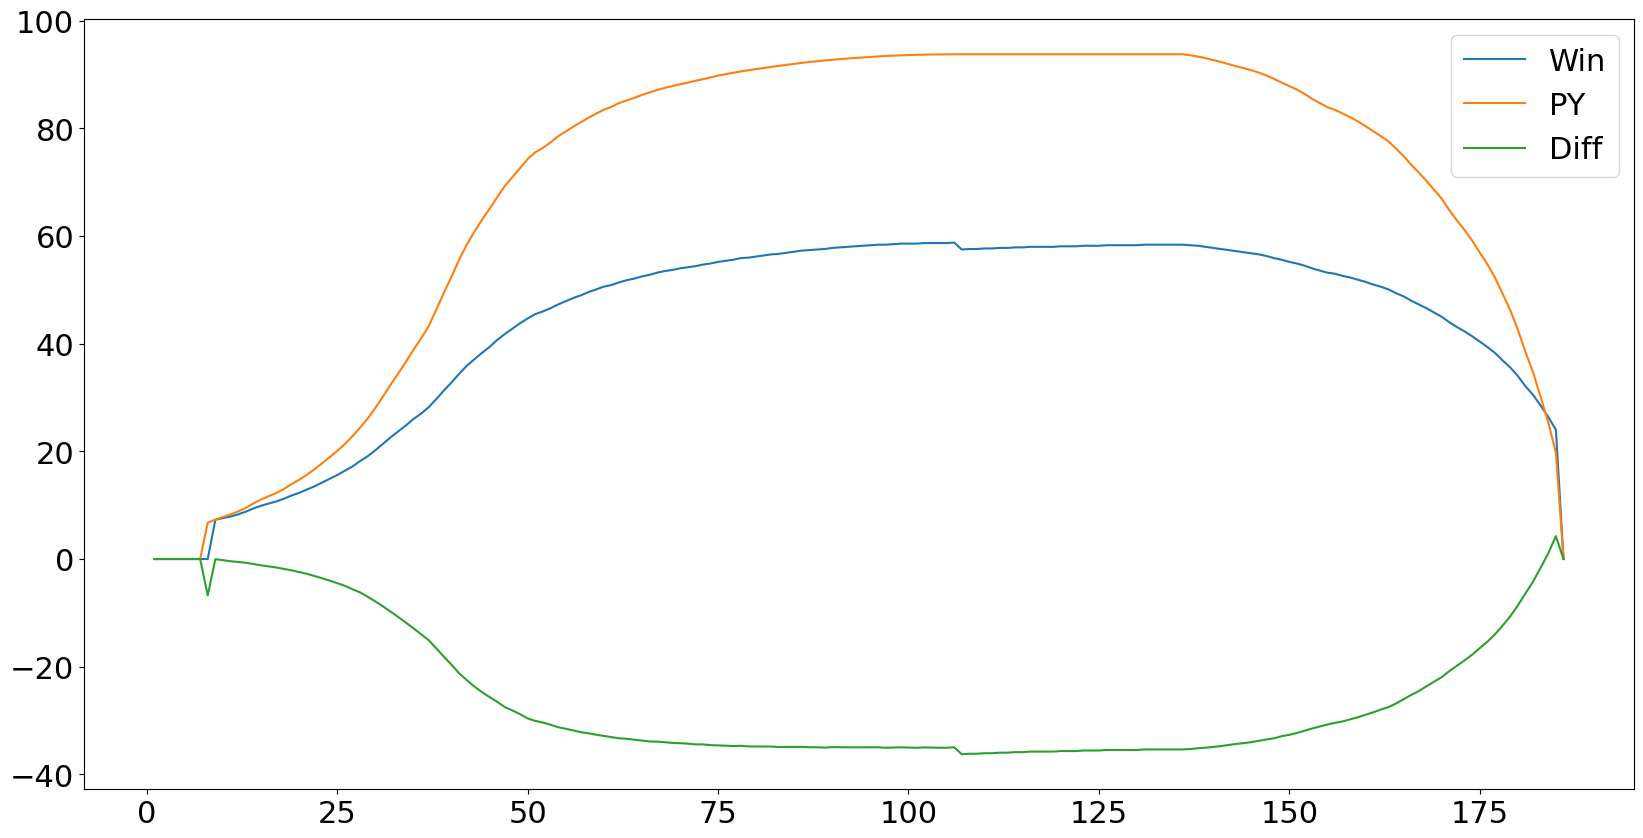

<Figure size 640x480 with 0 Axes>

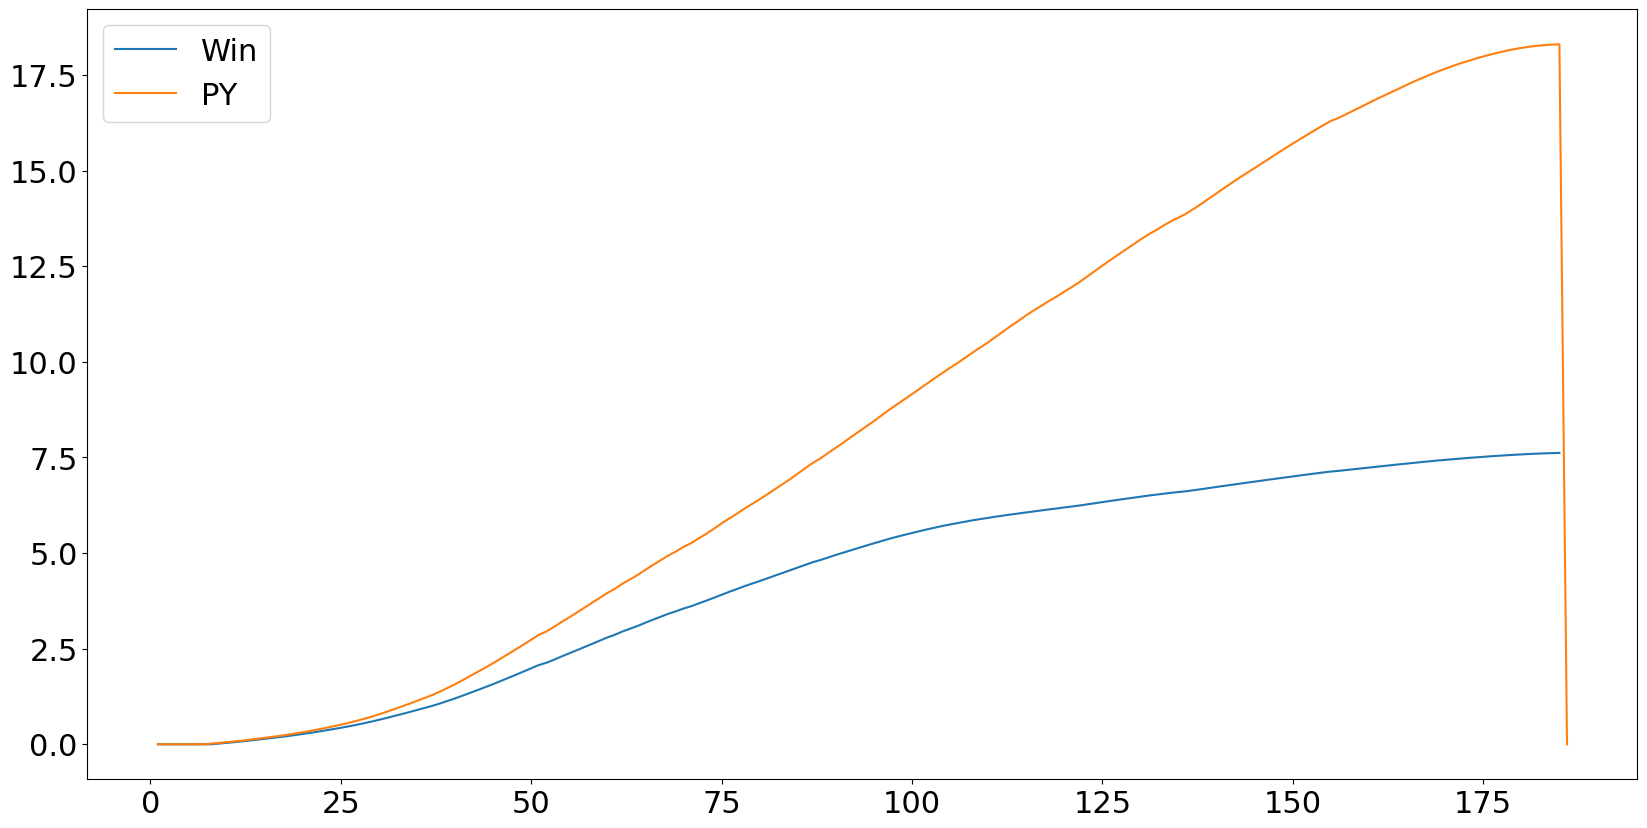

<Figure size 640x480 with 0 Axes>

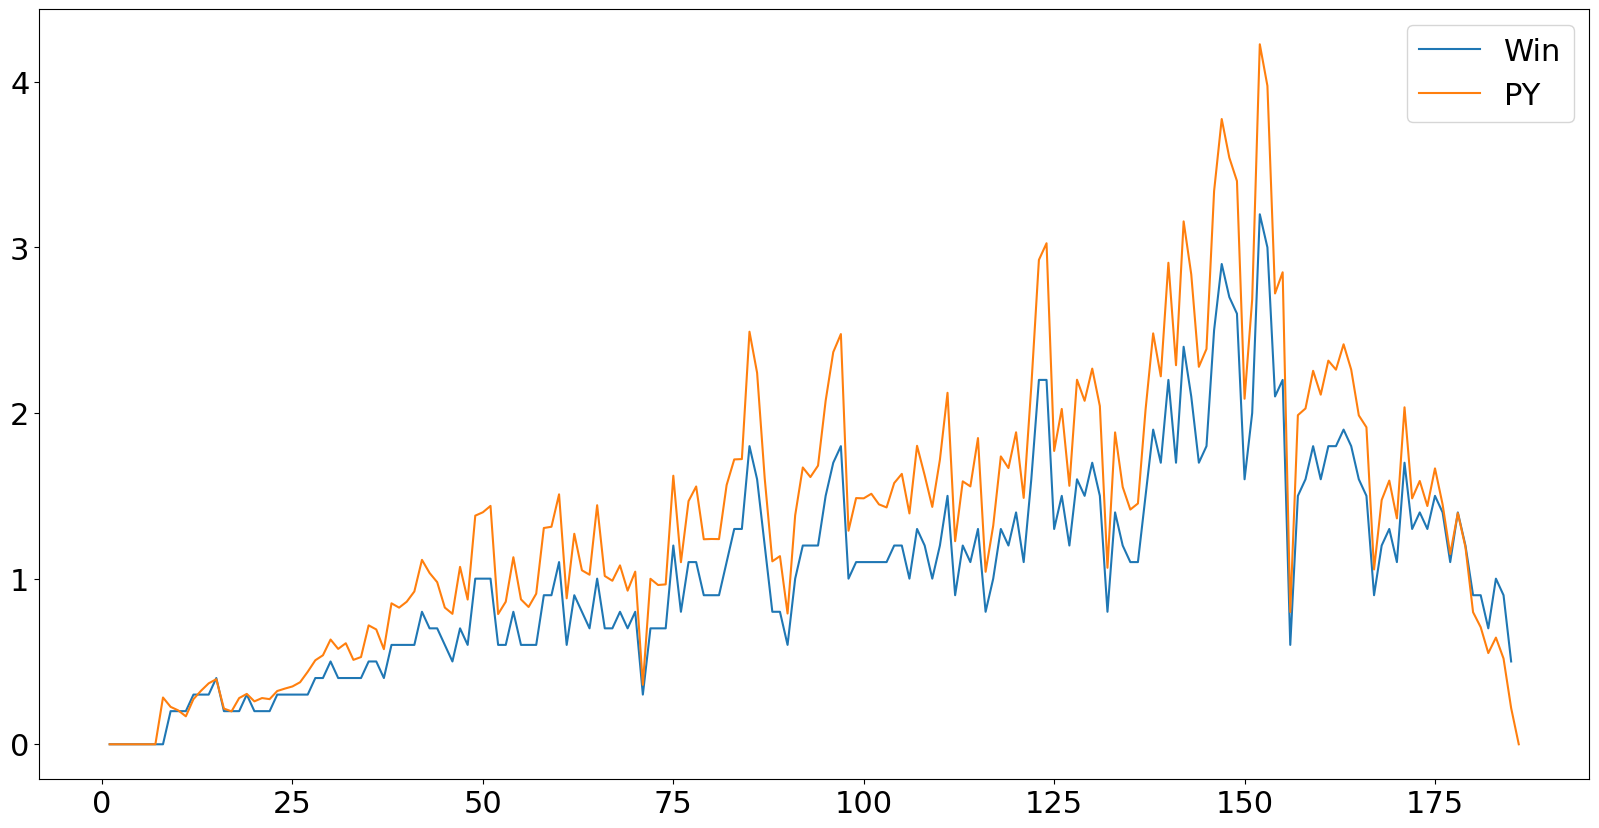

In [12]:
aq=pd.read_table('..\AquaCropV61Nr02052018\SIMUL\Crop.OUT',skiprows=4, delim_whitespace=True,encoding="latin1")
aq=aq.drop([0])

aq.to_csv('aq_temp.csv')

aq=pd.read_csv('aq_temp.csv')

import matplotlib.pyplot as plt

aq

time=np.array(range(1,len(aq.index)))
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,aq.loc[time,'CC'],label='Win')
plt.plot(time,model_results.loc[time,'canopy_cover']*100,label='PY')
plt.plot(time,aq.loc[time,'CC']-model_results.loc[time,'canopy_cover']*100,label='Diff')
plt.legend()
# plt.savefig('test_figs\wheat_CCx_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Biomass'],label='Win')
plt.plot(time,model_results.loc[time,'biomass']/100,label='PY')
plt.legend()
# plt.savefig('test_figs\wheat_Biomass_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Tr'],label='Win')
plt.plot(time,model_results.loc[time,'Tr'],label='PY')
plt.legend()